In [1]:
import pandas as pd
df = pd.read_csv('../data/netflix.csv')

In [2]:
#Quick insight into the data loaded
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [3]:
#Seeing what are the messiest columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
#Converting the dates to ISO format, disregarding the ones inputted differently
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [5]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [6]:
#Retrieving the total of blank values
df['date_added'].isna().sum()

np.int64(98)

In [7]:
#Dropping the rows where date_added is blank
df = df[df['date_added'].notna()]

In [8]:
#Checking row count
print(df.shape)

(8709, 12)


In [9]:
#Sorting the dataframe by date_added from the newest down
df.sort_values('date_added', ascending=False).head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [10]:
#Filling in missing values in 'cast and  'country' with 'unknown'
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [11]:
#Checking if all missing values have been filled in 'cast' and 'country'
df[['cast', 'country']].isna().sum()

cast       0
country    0
dtype: int64

In [12]:
#Retrieves the top 10 countries with the most Netflix content
df['country'].value_counts().head(10)

country
United States     2778
India              971
Unknown            827
United Kingdom     403
Japan              241
South Korea        195
Canada             173
Spain              141
France             122
Mexico             110
Name: count, dtype: int64

In [13]:
#A visual for the prior mentioned output using Matplotlib

import matplotlib.pyplot as plt

top_countries = df['country'].value_counts().head(10)

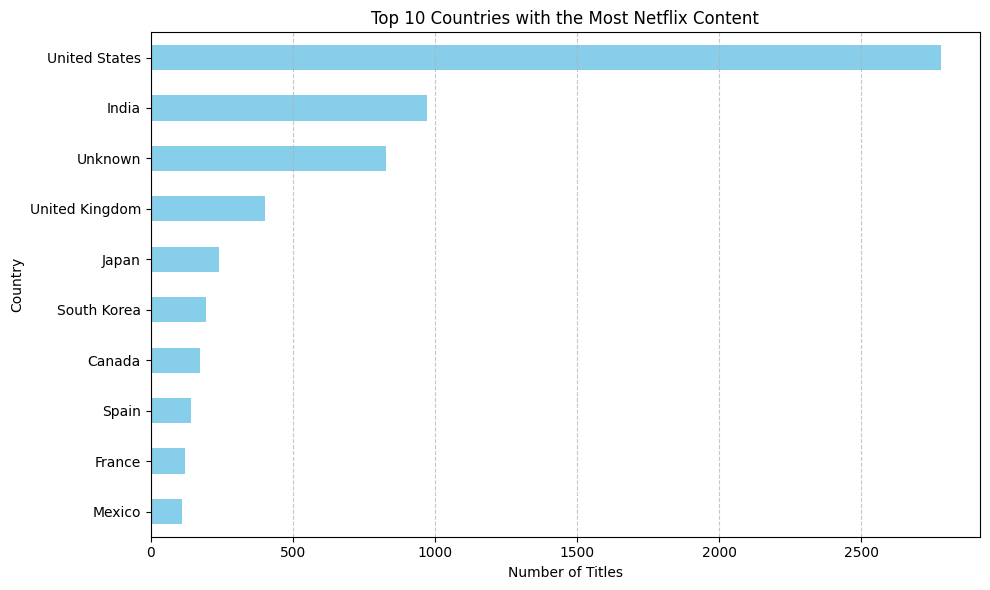

In [22]:
plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color = 'skyblue')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Netflix Content')
plt.gca().invert_yaxis() #This allows the US to be on the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../images/top_countries_bar_chart.png', bbox_inches='tight', dpi=300) #Save the chart
plt.show()

In [15]:
#Counting the different content types
df['type'].value_counts()

type
Movie      6131
TV Show    2578
Name: count, dtype: int64

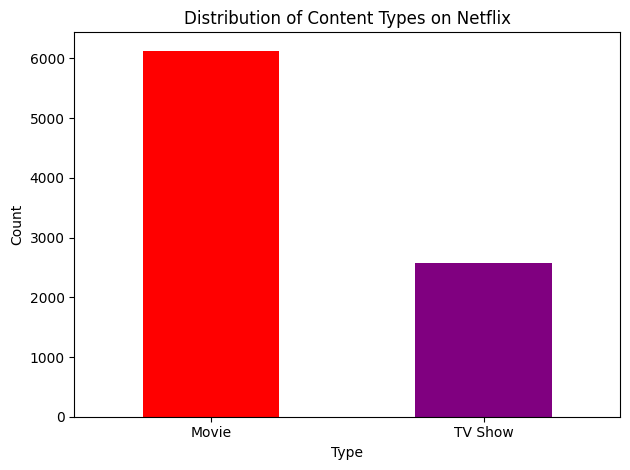

In [16]:
#Bar chart displaying content count
df['type'].value_counts().plot(kind='bar', color=['red', 'purple'])

plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
#Splitting the genre values
all_genres = df['listed_in'].dropna().str.split(', ')

#Flattening the list
flat_genres = [genre for sublist in all_genres for genre in sublist]

print(flat_genres[:10])

['Documentaries', 'International TV Shows', 'TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'International TV Shows', 'TV Action & Adventure', 'Docuseries', 'Reality TV', 'International TV Shows']


In [19]:
#Counting the genre frequency
genre_counts = pd.Series(flat_genres).value_counts()

print(genre_counts.head(10))

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1328
Documentaries                869
Action & Adventure           859
Independent Movies           756
TV Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


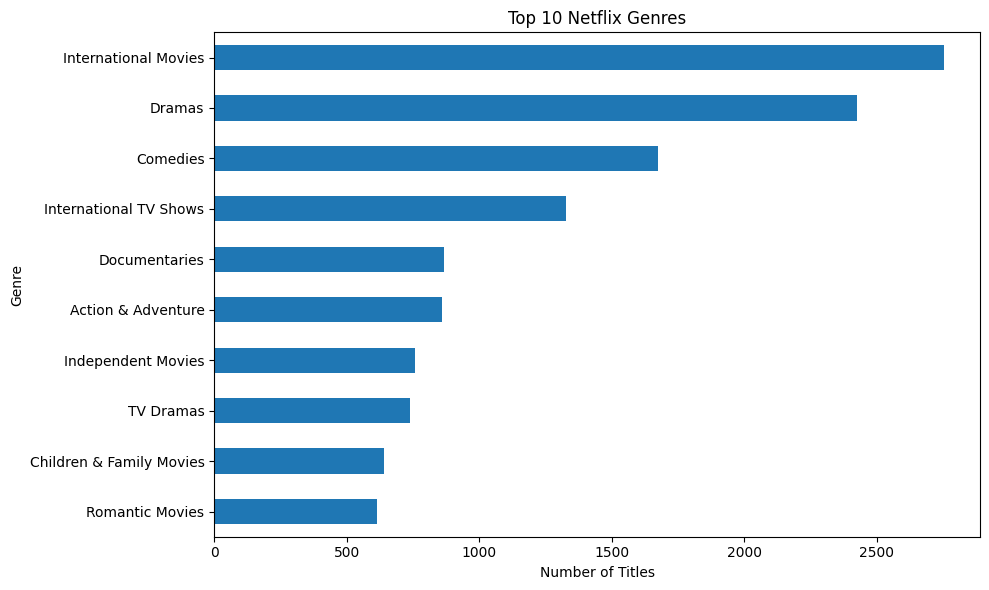

In [23]:
#Placing top 10 genres in a bar chart
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10,6))
top_10_genres.plot(kind='barh')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 10 Netflix Genres')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../images/top_genres_bar_chart.png', bbox_inches='tight', dpi=300)
plt.show()